<a href="https://colab.research.google.com/github/AdityaMK15/machine-learning-lab/blob/main/1BM22CS015_Lab_8_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
=== Results on train.csv ===
Accuracy Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

=== Iris Dataset (Default n_estimators=10) ===
Accuracy Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Best Accuracy: 1.0000 with n_estimators = 1


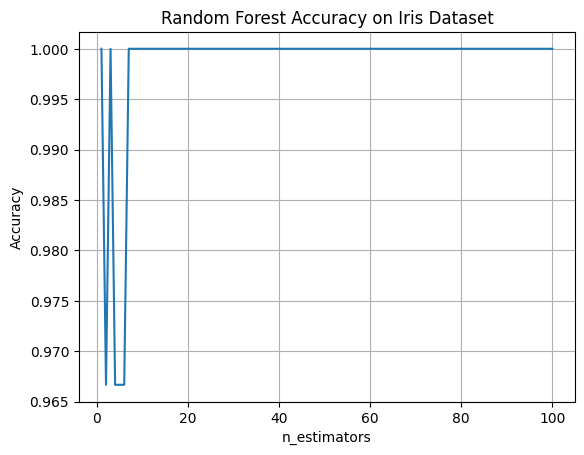

In [9]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


try:
    data = pd.read_csv("/content/iris (7).csv")
except Exception as e:
    print(f"Error reading the dataset: {e}")

    raise


print("Dataset Summary:")
print(data.info())

data = data.dropna()


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

if y.dtype != 'object' and y.nunique() < 20:
    y = y.astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("=== Results on train.csv ===")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




iris = load_iris()
X_iris = iris.data
y_iris = iris.target


X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)


rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train_iris, y_train_iris)
y_pred_iris_default = rf_default.predict(X_test_iris)

print("\n=== Iris Dataset (Default n_estimators=10) ===")
print("Accuracy Score:", accuracy_score(y_test_iris, y_pred_iris_default))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_iris_default))


scores = []
n_range = range(1, 101)

for n in n_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train_iris, y_train_iris)
    y_pred = model.predict(X_test_iris)
    acc = accuracy_score(y_test_iris, y_pred)
    scores.append(acc)

best_n = n_range[scores.index(max(scores))]
print(f"\nBest Accuracy: {max(scores):.4f} with n_estimators = {best_n}")


plt.plot(n_range, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy on Iris Dataset')
plt.grid(True)
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing


df = pd.read_csv('/content/train - train.csv')


X = df.iloc[:, :-1]
y = df.iloc[:, -1]



for column in X.columns:
    if X[column].dtype == 'object':
      le = preprocessing.LabelEncoder()
      X[column] = le.fit_transform(X[column])


if y.dtype == 'object':
  le = preprocessing.LabelEncoder()
  y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")






import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing


df = pd.read_csv('/content/iris (7).csv')


X = df.iloc[:, :-1]
y = df.iloc[:, -1]

for column in X.columns:
    if X[column].dtype == 'object':
      le = preprocessing.LabelEncoder()
      X[column] = le.fit_transform(X[column])


if y.dtype == 'object':
  le = preprocessing.LabelEncoder()
  y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier_default = RandomForestClassifier(random_state=42)
rf_classifier_default.fit(X_train, y_train)


y_pred_default = rf_classifier_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with default n_estimators: {accuracy_default}")


best_accuracy = 0
best_n_estimators = 0
for n_estimators in range(1, 101):
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy >= best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f"Best accuracy: {best_accuracy} with n_estimators = {best_n_estimators}")



Accuracy: 0.8659217877094972
Confusion Matrix:
[[ 26   0  17]
 [  0  12   5]
 [  2   0 117]]
Accuracy with default n_estimators: 1.0
Best accuracy: 1.0 with n_estimators = 100
